In [1]:
from ema_workbench.em_framework.evaluators import perform_experiments

from ema_workbench import (
    Model,
    Policy,
    MultiprocessingEvaluator,
    SequentialEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
)

from ema_workbench import save_results, load_results
from ema_workbench.em_framework.optimization import (EpsilonProgress,
                                                     ArchiveLogger)
from ema_workbench import Constraint
from ema_workbench.util import ema_logging
from ema_workbench.analysis import dimensional_stacking, parcoords
from ema_workbench import Scenario
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim

from problem_formulation import get_model_for_problem_formulation

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import os
import shutil

# Step 0

In [19]:
ema_logging.log_to_stderr(ema_logging.INFO)

#establish model with problem formulation 7
# you can select from problem formulation from 0 to 7
# the detailed of the problem formulation is in the `problem_formulation.py` file
dike_model, planning_steps = get_model_for_problem_formulation(6)

# Step 1 : DO Nothing

In [20]:
# create function to get no policy scenarios in EMA Workbench
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

policy1 = Policy("Policy 1", **get_do_nothing_dict())

In [21]:
# Pass the policies list and run the experiments
# since it is a do nothing policy, all problem formulation works
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policy1)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [01:04<00:00, 15.48it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [22]:
# save the results
experiments, outcomes = results

In [23]:
# export results to have a reproducible results
save_results((experiments, outcomes), './results_do_nothing_2.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Hidayahtullah Abdi R\Documents\EPA 2023 -2024\Q4\Model-Based Decision Making\epa141A_open-master\final assignment\results_do_nothing_2.tar.gz


In [25]:
# load results from the previous experiments
experiments, outcomes = load_results('./results_do_nothing_2.tar.gz')
experiments

[MainProcess/INFO] results loaded successfully from C:\Users\Hidayahtullah Abdi R\Documents\EPA 2023 -2024\Q4\Model-Based Decision Making\epa141A_open-master\final assignment\results_do_nothing_2.tar.gz


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,44,272.583915,1.0,0.039202,134.396621,10.0,0.771865,86.617726,1.0,0.204099,...,0,0,0,0,0,0,0,1000,Policy 1,dikesnet
1,124,313.219628,10.0,0.041630,190.796602,10.0,0.985773,32.488774,10.0,0.520522,...,0,0,0,0,0,0,0,1001,Policy 1,dikesnet
2,26,322.800997,1.5,0.102374,95.916278,10.0,0.340548,221.021126,1.5,0.064612,...,0,0,0,0,0,0,0,1002,Policy 1,dikesnet
3,65,256.984784,1.0,0.880426,53.406186,10.0,0.691708,251.497756,1.5,0.210238,...,0,0,0,0,0,0,0,1003,Policy 1,dikesnet
4,30,233.905805,10.0,0.218928,196.386201,10.0,0.325211,57.931457,1.5,0.727023,...,0,0,0,0,0,0,0,1004,Policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,118.407053,10.0,0.741503,290.181157,10.0,0.149861,223.548051,10.0,0.139350,...,0,0,0,0,0,0,0,1995,Policy 1,dikesnet
996,51,185.359918,10.0,0.161346,259.162303,1.0,0.054127,141.179099,1.0,0.546341,...,0,0,0,0,0,0,0,1996,Policy 1,dikesnet
997,72,58.408147,1.5,0.475624,197.575384,1.5,0.482409,235.749696,10.0,0.355574,...,0,0,0,0,0,0,0,1997,Policy 1,dikesnet
998,5,46.198403,1.5,0.677242,187.150497,1.0,0.158773,48.802535,1.0,0.512685,...,0,0,0,0,0,0,0,1998,Policy 1,dikesnet


In [26]:
outcomes

{'A1_Expected_Annual_Damage': array([1.88967791e+09, 2.20055244e+09, 3.03976928e+09, 0.00000000e+00,
        1.90482417e+09, 6.04752519e+08, 2.80610630e+09, 2.80134520e+09,
        3.48633651e+07, 1.90893445e+09, 3.06369539e+07, 0.00000000e+00,
        2.64190807e+09, 2.41262669e+09, 2.81241135e+09, 3.00522246e+09,
        2.51361023e+08, 0.00000000e+00, 2.90874211e+07, 2.46731731e+09,
        3.29746822e+08, 3.05507651e+07, 2.33418383e+09, 0.00000000e+00,
        5.74879707e+07, 1.89708833e+09, 2.66688542e+09, 0.00000000e+00,
        3.05544889e+09, 2.01708228e+09, 6.37001683e+08, 1.15645492e+07,
        1.87946772e+09, 3.20051884e+09, 0.00000000e+00, 2.44608719e+09,
        2.58305267e+09, 3.88098195e+07, 0.00000000e+00, 0.00000000e+00,
        3.99337418e+08, 0.00000000e+00, 8.29732567e+07, 7.19578907e+08,
        2.01789387e+09, 5.78241275e+07, 4.80466709e+08, 2.09172997e+09,
        3.26946422e+09, 1.25418379e+08, 8.49853453e+07, 3.53113135e+09,
        0.00000000e+00, 0.00000000e

In [8]:
# transform the outcomes array to panda dataframe
outcomes = pd.DataFrame(outcomes)

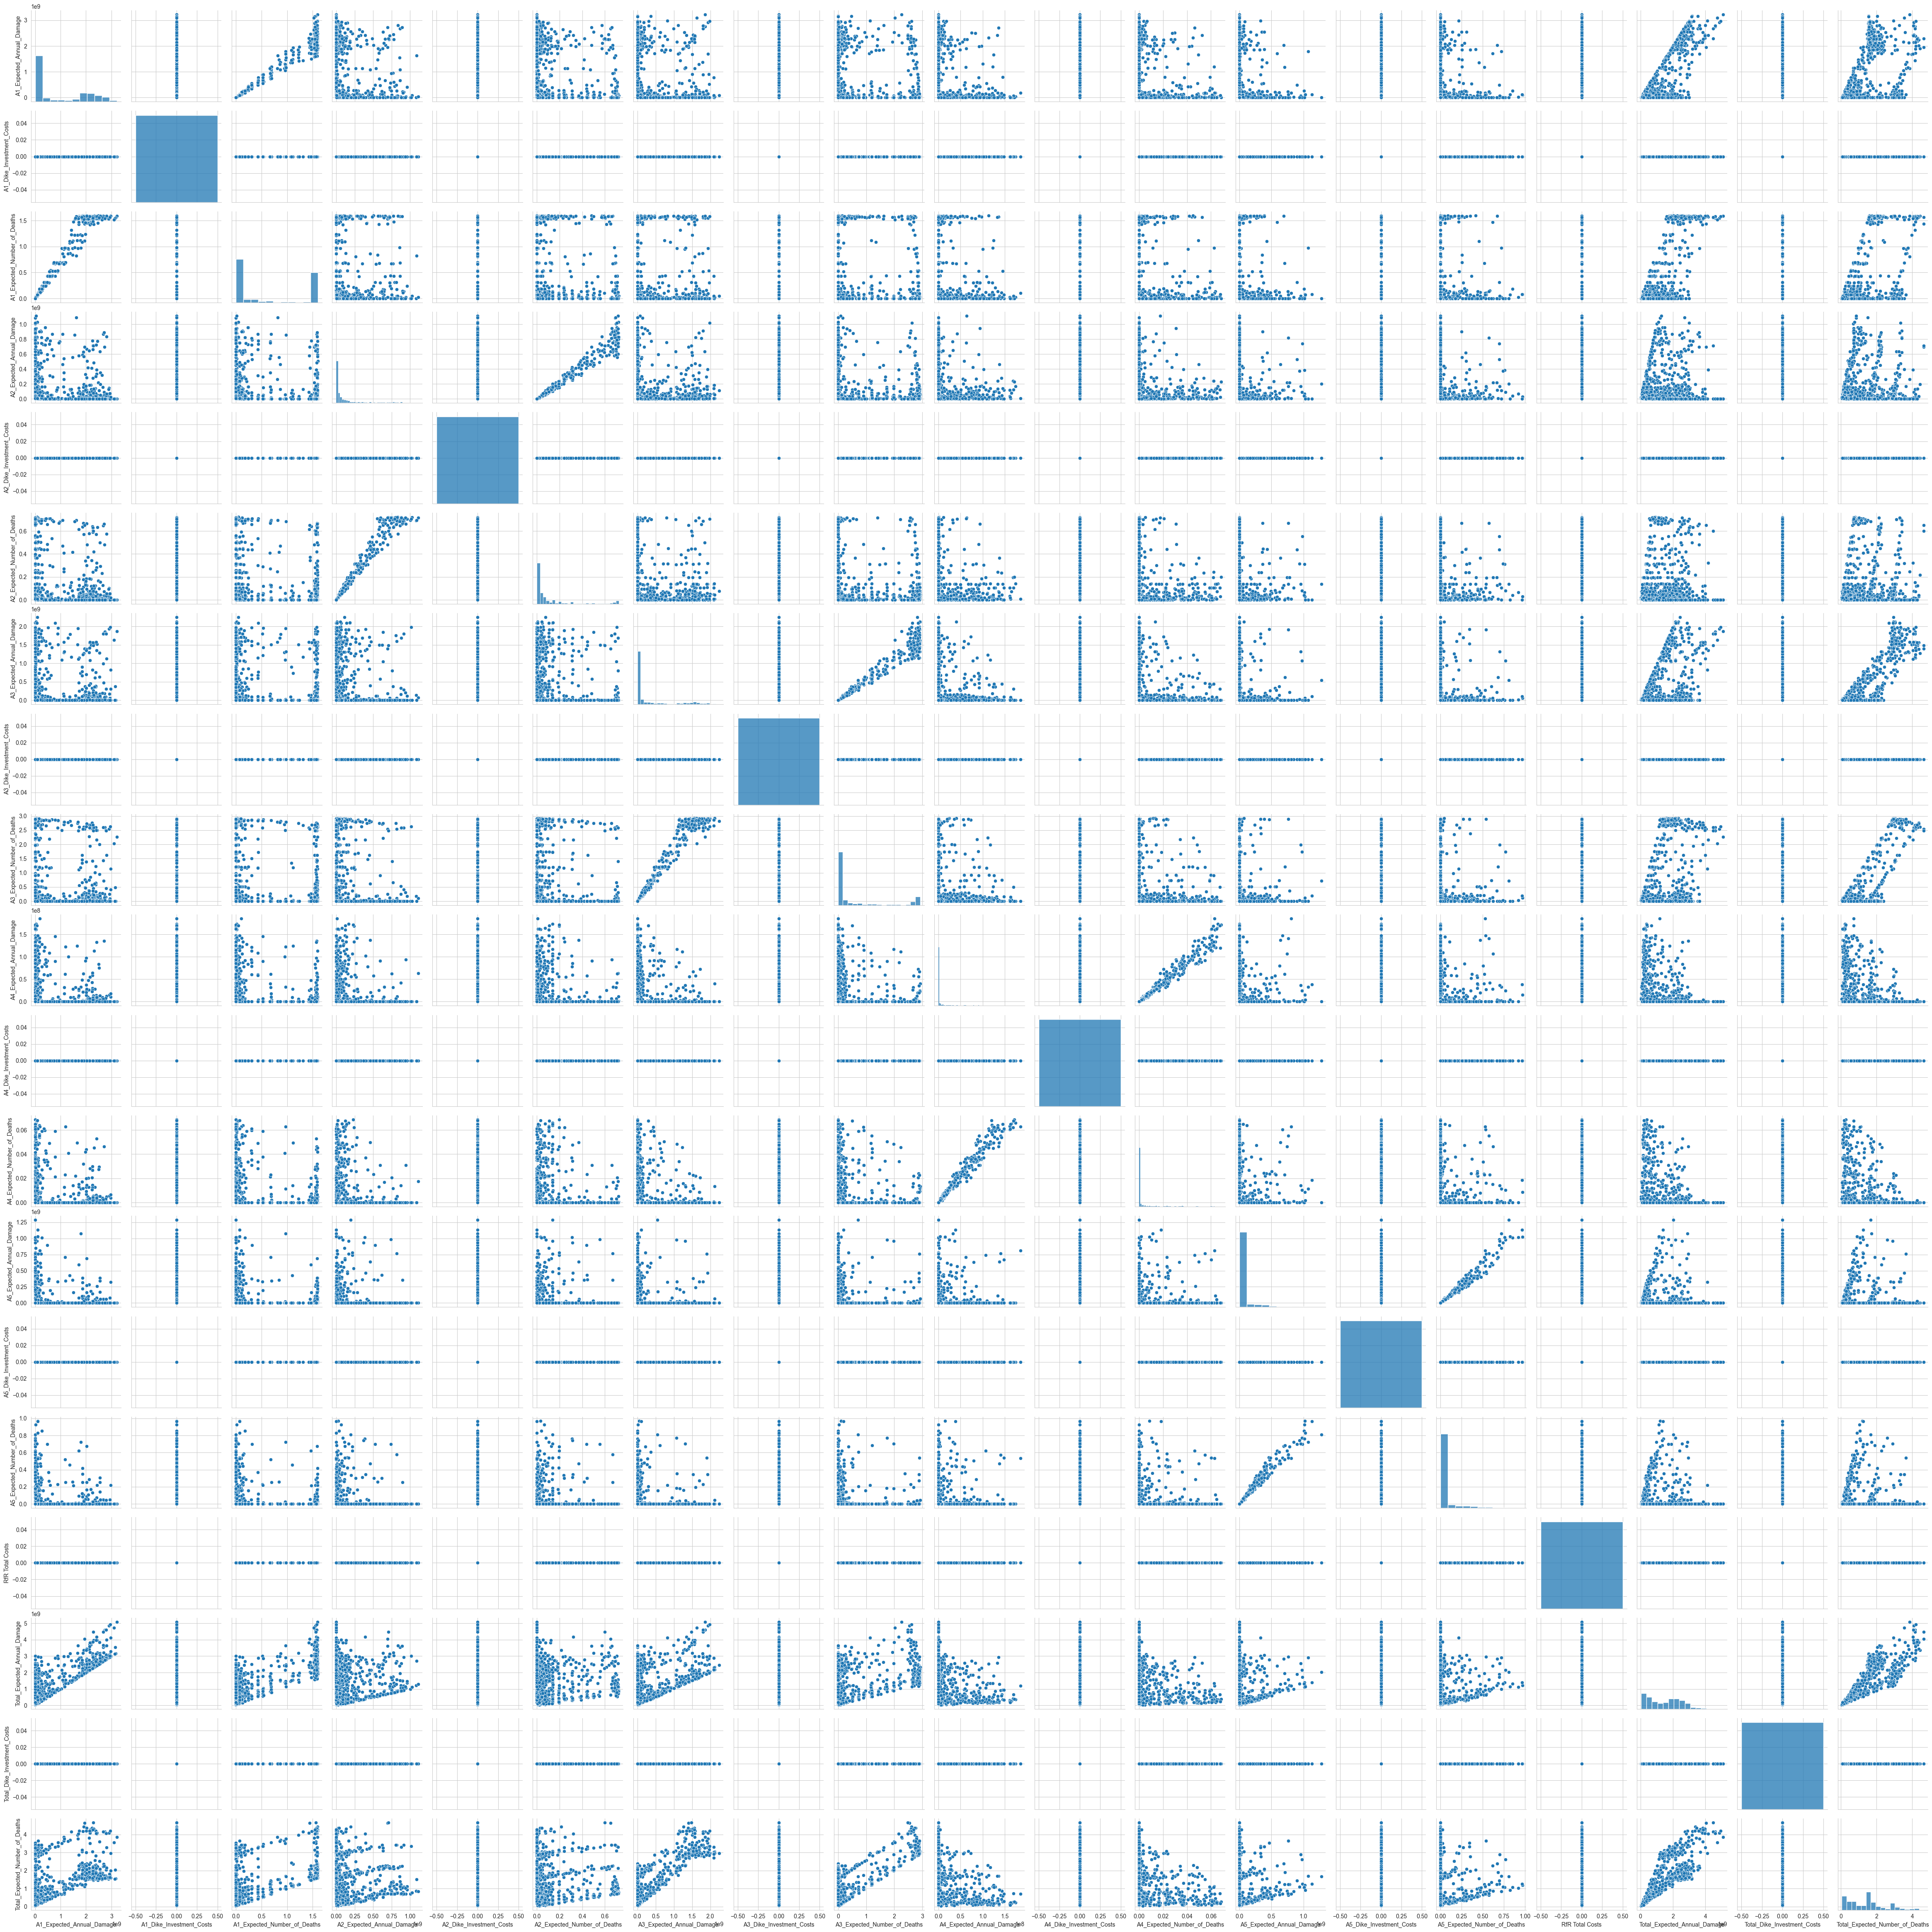

In [9]:
# pairplot to see the relationship between the outcomes
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

In [10]:
# drop the levers and unnecessary columns to analyse the coverage
# drop the levers
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
# drop the unnecessary attribute
cleaned_experiments.drop(columns= ['scenario', 'policy', 'model'], inplace= True)
# show the dataframe
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,109,134.272449,1.5,0.264484,173.968571,10.0,0.836630,168.982417,1.0,0.341727,125.655063,10.0,0.371271,331.269181,10.0,0.990124,3.5,1.5,1.5
1,50,283.092937,10.0,0.791682,122.367013,10.0,0.843742,136.780690,10.0,0.710995,158.632299,1.0,0.707013,328.169029,10.0,0.235803,3.5,2.5,2.5
2,62,325.579663,1.5,0.632447,167.721082,1.5,0.988161,196.320032,10.0,0.686006,157.396632,1.5,0.896118,193.779984,1.0,0.248946,4.5,4.5,1.5
3,41,37.805946,1.0,0.594750,147.944845,1.0,0.288086,250.576117,10.0,0.094438,297.613532,10.0,0.255534,302.869322,10.0,0.806798,3.5,1.5,4.5
4,40,246.231282,1.5,0.095063,244.149696,1.5,0.882920,345.836021,10.0,0.247259,102.151448,1.0,0.358574,76.459970,1.0,0.674975,2.5,2.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,269.796061,1.5,0.807359,127.644211,10.0,0.037232,80.440967,1.5,0.716507,270.507008,1.0,0.260180,303.050949,1.0,0.533480,3.5,2.5,2.5
996,57,279.570375,10.0,0.922066,303.695169,1.5,0.763733,188.668673,1.5,0.979273,197.229964,1.0,0.002756,36.024974,1.0,0.124413,1.5,1.5,4.5
997,102,54.342007,10.0,0.891666,179.188879,1.5,0.832132,165.967387,1.5,0.529078,156.078789,1.5,0.236095,55.650420,10.0,0.109487,3.5,3.5,4.5
998,76,206.942702,1.0,0.568517,250.104286,10.0,0.809717,256.895928,1.5,0.896476,338.378538,10.0,0.362604,95.757558,1.0,0.115521,3.5,4.5,3.5


In [11]:
# check the coverage of the scenarios
# set the preferred direction of the outcomes
# in this case 5% of the highest values
# 95th percentile of the worst outcome

# example for Expected Number of Deaths
#data_deaths = outcomes['Expected Number of Deaths']
#y_deaths = data_deaths > np.percentile(data_deaths, 95)
#y_deaths = np.array(y_deaths)

# example for Expected Number of Damages
data_damages = outcomes['Total_Expected_Annual_Damage']
y_damages = data_damages > np.percentile(data_damages, 95)
y_damages = np.array(y_damages)

# example for Expected Number of RfR Investment Costs
data_rfr = outcomes['RfR Total Costs']
y_rfr = data_rfr > np.percentile(data_rfr, 95)
y_rfr = np.array(y_rfr)

# example for Expected Number of RfR Investment Costs
data_dike = outcomes['Total_Dike_Investment_Costs']
y_dike = data_dike > np.percentile(data_dike, 95)
y_dike = np.array(y_dike)

In [12]:
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A1_Expected_Annual_Damage', variable_name=('A.1_Expected Annual Damage',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A1_Dike_Investment_Costs', variable_name=('A.1_Dike Investment Costs',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A1_Expected_Number_of_Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A2_Expected_Annual_Damage', variable_name=('A.2_Expected Annual Damage',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A2_Dike_Investment_Costs', variable_name=('A.2_Dike Investment Costs',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A2_Expected_Number_of_Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x0000015A0FB6F740>)
ScalarOutcome('A3_Expected_Annual_Damage', variable_name=('A.3_Expected Annual Damage',), function=<function sum_over at 0x0000015A0FB6F740>

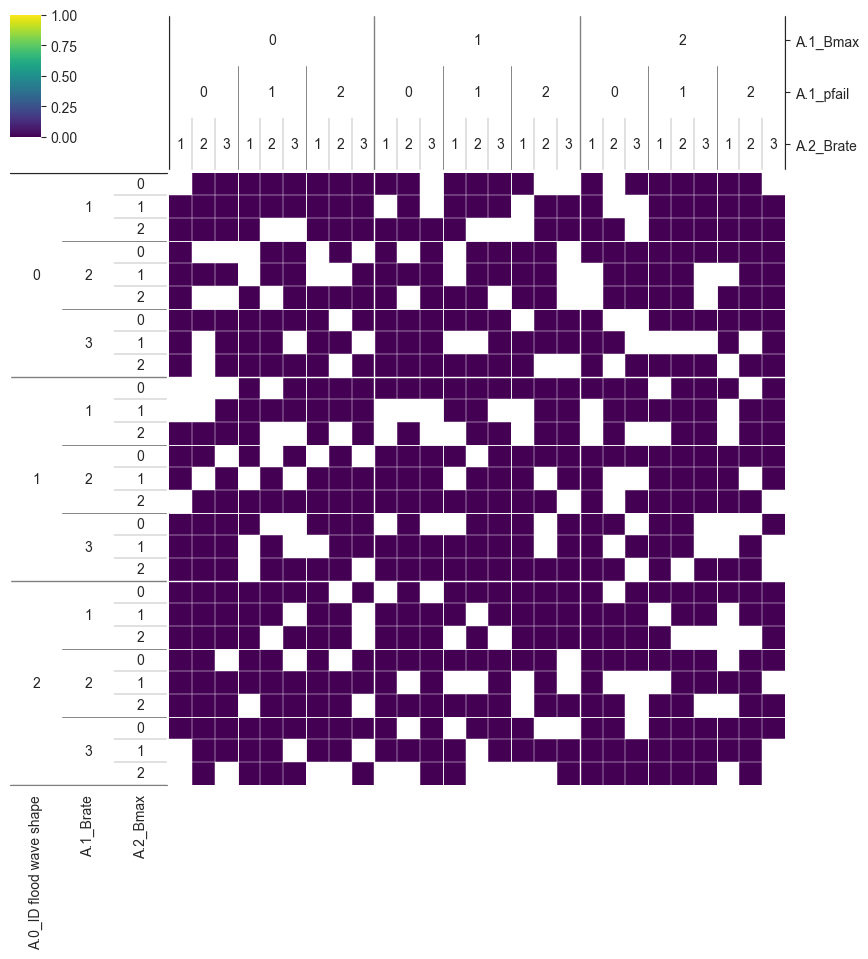

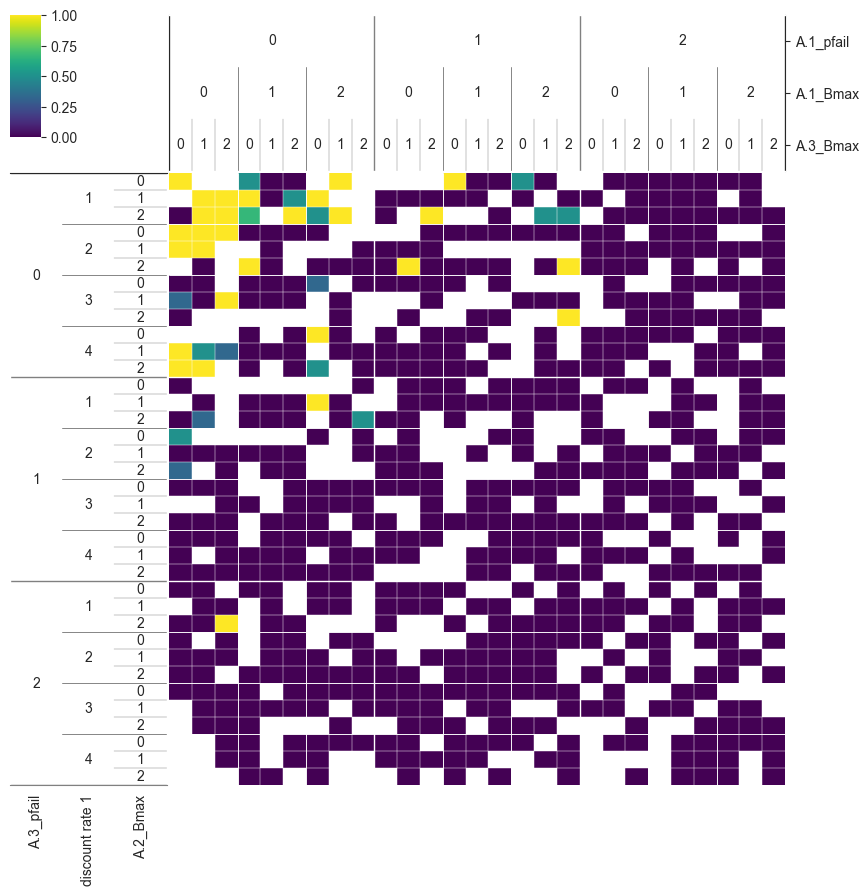

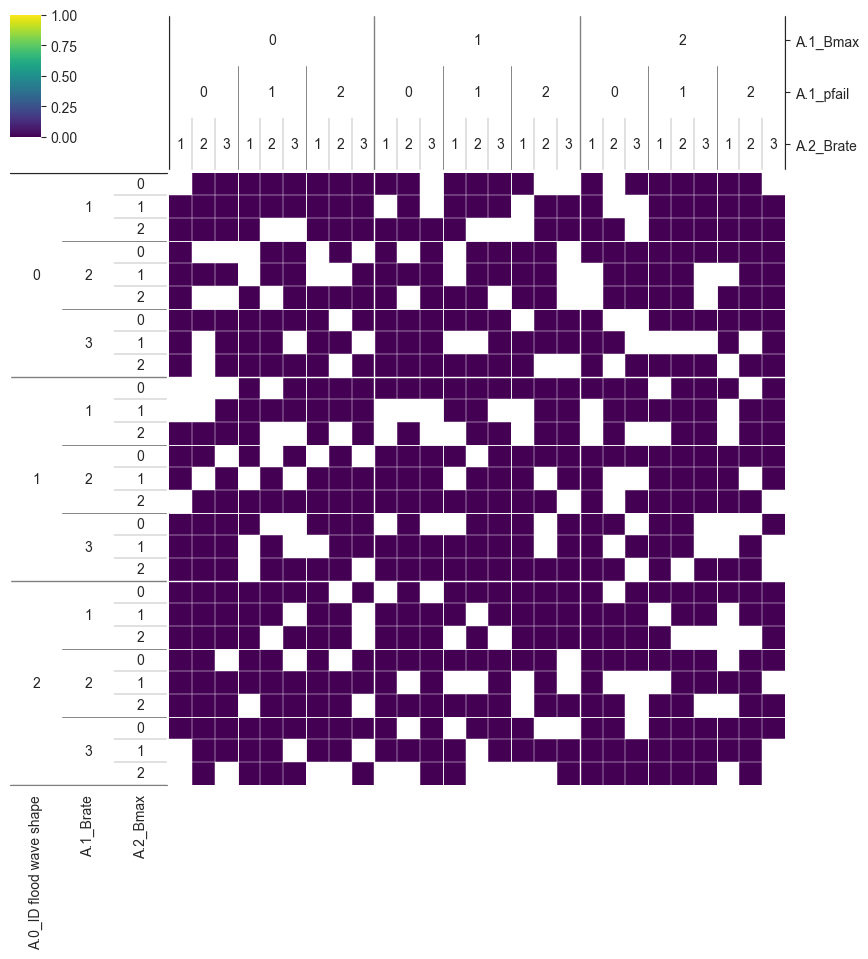

In [13]:
# create the pivot plot
# dimensional_stacking.create_pivot_plot(cleaned_experiments, y_deaths)
dimensional_stacking.create_pivot_plot(cleaned_experiments, y_damages)
dimensional_stacking.create_pivot_plot(cleaned_experiments, y_dike)

# Scenario Check

In [14]:
# load results from the previous experiments
experiments, outcomes = load_results('./results_do_nothing_2.tar.gz')

[MainProcess/INFO] results loaded successfully from C:\Users\Hidayahtullah Abdi R\Documents\EPA 2023 -2024\Q4\Model-Based Decision Making\epa141A_open-master\final assignment\results_do_nothing_2.tar.gz


C:\Users\Hidayahtullah Abdi R\AppData\Local\Programs\Python\Python312\Lib\site-packages\ema_workbench\analysis\parcoords.py:220: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


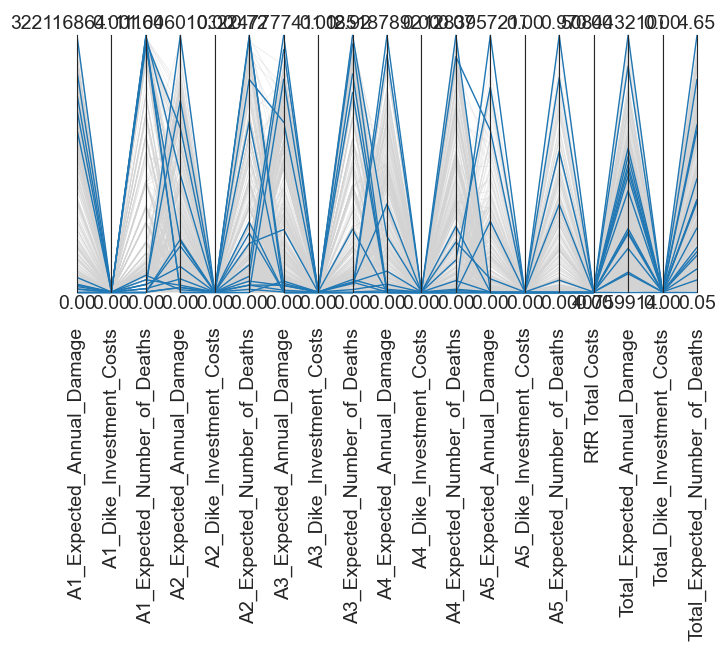

In [15]:
# acquire y dataframe
outcomes_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# get the unique indices for the minima and maxima across
indices = pd.concat([outcomes_data.idxmax(), outcomes_data.idxmin()]).unique()

limits = parcoords.get_limits(outcomes_data)
axes = parcoords.ParallelAxes(limits)

# set the linewidth lower, and make the lines slightly transpartant using alpha
# this often helps reveal patterns in the results.
axes.plot(outcomes_data, color='lightgrey', lw=0.5, alpha=0.5)
axes.plot(outcomes_data.iloc[indices, :], color=sns.color_palette()[0], lw=1)

fig = plt.gcf()
fig.set_size_inches((8, 4))

# show the highlighted scenario among the set of outcomes
plt.show()

In [16]:
# show the worst and best case scenario
print(outcomes_data.idxmax())
print(outcomes_data.idxmin())

A1_Expected_Annual_Damage          628
A1_Dike_Investment_Costs             0
A1_Expected_Number_of_Deaths        41
A2_Expected_Annual_Damage          190
A2_Dike_Investment_Costs             0
A2_Expected_Number_of_Deaths       544
A3_Expected_Annual_Damage          896
A3_Dike_Investment_Costs             0
A3_Expected_Number_of_Deaths       333
A4_Expected_Annual_Damage          598
A4_Dike_Investment_Costs             0
A4_Expected_Number_of_Deaths       145
A5_Expected_Annual_Damage          653
A5_Dike_Investment_Costs             0
A5_Expected_Number_of_Deaths       666
RfR Total Costs                      0
Total_Expected_Annual_Damage       628
Total_Dike_Investment_Costs          0
Total_Expected_Number_of_Deaths    858
dtype: int64
A1_Expected_Annual_Damage            1
A1_Dike_Investment_Costs             0
A1_Expected_Number_of_Deaths         1
A2_Expected_Annual_Damage            0
A2_Dike_Investment_Costs             0
A2_Expected_Number_of_Deaths         0
A3_Expected_

In [17]:
# get dataframe of the worst and best case scenario, refer to the index
selected = cleaned_experiments.loc[[563, 4450]] #manual input
# show the selected scenario
selected

KeyError: '[4450] not in index'

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

#establish model with problem formulation 7
# you can select from problem formulation from 0 to 7
# the detailed of the problem formulation is in the problem_formulation.py file

<Logger EMA (DEBUG)>

In [7]:
dike_model, planning_steps = get_model_for_problem_formulation(6)

# 50 policies from file
policies_df = pd.read_csv('./output/policies__constraints_filtered__diverse_set_50.csv',
                        index_col='Policy Name')
policies_df = policies_df[[L.name for L in dike_model.levers]]

policies = []
for name, policy in policies_df.iterrows():
    policies.append(Policy(str(name), **policy.to_dict()))

# 1000 scenarios: limited by compute time x 50 policies, but a
# large number is not needed, as the goal is not scenario search
n_scenarios = 1000

In [8]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,policies)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 1000 scenarios * 50 policies * 1 model(s) = 50000 experiments
100%|████████████████████████████████████| 50000/50000 [40:31<00:00, 20.57it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# save the results
experiments, outcomes = results

In [12]:
# export results to have a reproducible results
save_results((experiments, outcomes), './output/robustness_results_policies.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\prima\1) Model Based Decision Making\2) Assignments\epa141A_open-master\epa141A_open-master\final assignment - Edit\final assignment\final assignment\output\robustness_results_policies.tar.gz
